In [1]:
import numpy as np                 #for processing arrays (columns)
import pandas as pd                #for processing dataframes  (tables)
import sqlite3 as sql              #for SQL of course!
import matplotlib.pyplot as plt    #for making visualizations!
plt.style.use('fivethirtyeight')   #A helpful style package

---
#### CS 260 Final Project - SP23
---

# NBA Team Statistics 1997-2022






By: Brendan Hasara, Matthew Chylack, Travis Kerr


---

## 1. Introduction

For this project, our group explored... (This section will be finished at a later date and can be skipped at this time.)

---

## 2. Data

A direct link to the data can be found at the following website. 
 * https://data.world/etocco/nba-team-stats/workspace/file?filename=NBA_Team_Stats.csv

In [2]:
#In this cell, we load the data.
try:
    #load your csv data from github.
    csv_data = pd.read_csv("https://raw.githubusercontent.com/MattChylack/Basketball/main/CLEANNBA_Team_Stats%20(1).csv")

    #Connect to a database - use a different name for your db than "example"
    conn = sql.connect('basketball.db')

    #Load the csv data into a table using the connection to the db
    #that you just created in the previous line.
    csv_data.to_sql('basketball', conn, index = False)

except ValueError: 
    print("""A ValueError occurred. If you've run this cell twice, 
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

In [3]:
#Show the rows of the table.
sql_statement = """SELECT * 
                   FROM basketball"""

results = pd.read_sql_query(sql_statement, conn)
results

,no,team,g,min,pts,reb,ast,stl,blk,to,...,oreb,fgm_a,pct,3gm_a,pct.1,ftm_a,pct.2,eff,dff,year
0,1,Chicago,103,48.4,96.0,44.1,23.1,8.6,4.3,13.0,...,14.9,36.7-81.7,0.449,3.9-12.0,0.323,18.7-25.2,0.741,111.6,17.5,1997-1998
1,2,Utah,102,48.3,98.6,40.8,24.7,7.6,4.8,14.7,...,11.3,35.9-74.3,0.483,3.1-8.4,0.368,23.8-30.9,0.768,116.3,17.5,1997-1998
2,3,Phoenix,86,48.6,99.3,41.9,25.6,9.2,5.3,14.4,...,12.1,38.2-82.0,0.466,5.2-14.7,0.355,17.7-23.6,0.747,117.1,13.6,1997-1998
3,4,L.A.Lakers,95,48.3,104.8,42.9,24.3,8.7,6.8,14.7,...,13.2,38.0-79.1,0.480,6.1-17.3,0.350,22.8-33.7,0.675,120.8,13.2,1997-1998
4,5,San Antonio,91,48.4,92.5,44.1,21.9,6.2,6.9,15.3,...,11.9,35.1-75.1,0.468,3.7-10.8,0.344,18.5-26.8,0.688,108.0,13.1,1997-1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,26,Orlando,82,48.2,104.2,44.3,23.7,6.8,4.5,13.8,...,9.1,38.3-88.3,0.434,12.2-36.8,0.331,15.5-19.7,0.787,115.5,-16.0,2021-2022
739,27,Detroit,82,48.2,104.8,43.0,23.5,7.7,4.8,13.4,...,11.0,38.2-88.6,0.430,11.3-34.6,0.326,17.2-22.0,0.782,115.1,-16.7,2021-2022
740,28,Portland,82,48.1,106.2,42.9,22.9,8.0,4.5,13.7,...,10.4,38.5-87.1,0.443,12.7-36.8,0.346,16.4-21.6,0.760,117.1,-19.0,2021-2022
741,29,Oklahoma City,82,48.3,103.7,45.6,22.2,7.6,4.6,13.3,...,10.4,38.3-89.1,0.430,12.1-37.4,0.323,15.0-19.9,0.756,114.8,-19.2,2021-2022


The basketball table has 22 columns/variables and 725 rows.  All variables are explained in this section. 

Note that the table was read in from a csv, but had we created a formal SQLite database for the table, the schema would have been as follows.

```
CREATE TABLE "basketball" (
        "no" INTEGER,
        "team" TEXT,
        "g" INTEGER,
        "min" REAL,
        "pts" REAL,
        "reb" REAL,
        "ast" REAL,
        "stl" REAL,
        "blk" REAL,
        "to" REAL,
        "pf" REAL,
        "dreb" REAL,
        "oreb" REAL,
        "fgm_a" REAL,
        "pct" REAL,
        "3gm_a" REAL,
        "pct_3" REAL,
        "ftm_a" REAL,
        "pct_F" REAL,
        "eff" REAL,
        "dff" REAL,
        "year" Integer

        " 
       
        
        PRIMARY KEY("team","year")
);
```

Here are the variables, their descriptions, their units, their types, and some descriptive statistics.

* **no** – No of team from statistically best to worst. 
    * Number of missing values: 0
    * Contains 30 distinct values:
        * 1-30, giving a number to an NBA team depending on how statistically good they are.  
    * Any other important facts, should you discover them during your analysis.

* **team** – NBA team. 
    * Number of missing values: 0
    * Units: if necessary; delete otherwise.
    * Contains 33 distinct values:
        * Golden State Warriors, Miami Heat, Cleveland Caveliers, etc. Includes 3 teams that are disbanded or currently have changed names.  
    * Any other important facts, should you discover them during your analysis.

* **year** – Season of NBA team. 
    * Number of missing values: 0
    * Units: if necessary; delete otherwise.
    * Contains 25 distinct values:
        * From NBA season 1997-1998 to 2021-2022
    * Any other important facts, should you discover them during your analysis.

* **g** – Number of games played in season
    * Number of missing values: 0
    * Units: Games per season (including playoff games, not including pre-season).
    * max value: 108
    * min value: 50
    * average value: 84.66069
    * Any other important facts, should you discover them during your analysis.

* **min** – Number of minutes
    * Number of missing values: 0
    * Units: Minutes per game.
    * max value: 49
    * min value: 20
    * average value: 46.081517
    * Any other important facts, should you discover them during your analysis.

* **pts** – Average points per game.
    * Number of missing values: 0
    * Units: Team points per game.
    * max value: 117.8
    * min value: 81.9
    * average value: 100.309379
    * Any other important facts, should you discover them during your analysis.

* **reb** – Average rebounds per game.
    * Number of missing values: 0
    * Units: Team rebounds per game.
    * max value: 51.1
    * min value: 35.8
    * average value: 42.576828
    * Any other important facts, should you discover them during your analysis.

* **ast** – Average assists per game
    * Number of missing values: 0
    * Units: Team assists per game.
    * max value: 30.0
    * min value: 15.4
    * average value: 22.051724
    * Any other important facts, should you discover them during your analysis.

* **stl** – Average steals per game.
    * Number of missing values: 0
    * Units: Team steals per game.
    * max value: 12.0
    * min value: 5.5
    * average value: 7.641241
    * Any other important facts, should you discover them during your analysis.

* **blk** – Average blocks per game.
    * Number of missing values: 0
    * Units: Team blocks per game.
    * max value: 8.1
    * min value: 2.5
    * average value: 4.909517
    * Any other important facts, should you discover them during your analysis.

* **to** – Average turnovers per game.
    * Number of missing values: 0
    * Units: Team turnovers per game.
    * max value: 17.5
    * min value: 10.8
    * average value: 13.836828
    * Any other important facts, should you discover them during your analysis.

* **pf** – Average personal fouls per game.
    * Number of missing values: 0
    * Units: Team personal fouls per game. 
    * max value: 27.1
    * min value: 16.6
    * average value: 21.174345
    * Any other important facts, should you discover them during your analysis.

* **dreb** – Average defensive rebounds per game.
    * Number of missing values: 0
    * Units: Team defensive rebounds per game.
    * max value: 41.7
    * min value: 24.9
    * average value: 31.391448
    * Any other important facts, should you discover them during your analysis.

* **oreb** – Average offensive rebounds per game.
    * Number of missing values: 0
    * Units: Team offensive rebounds per game.
    * max value: 16.4
    * min value: 7.3
    * average value: 11.186897
    * Any other important facts, should you discover them during your analysis.

* **fgm_a** – Average of field goals made - attempted field goals.
    * Number of missing values: 0
    * Units: Team field goals made to field goal attempts.
    * max value: 44.1-91.6
    * min value: 30.4-75.1
    * average value: 37.360138
    * Any other important facts, should you discover them during your analysis.

* **pct** – Percentage of field goals made / attempted field goals.
    * Number of missing values: 0
    * Units: Percent field goals made divided by attempted field goals.
    * max value: 0.504
    * min value: 0.401
    * average value: 0.452305
    * Any other important facts, should you discover them during your analysis.

* **3gm_a** – 3 pointers made per game - attempted 3 pointers.
    * Number of missing values: 0
    * Units: Team 3 pointers made to 3 pointers attempts.
    * max value: 9.9-28.9
    * min value: 10.0-25.2
    * average value: 7.365379
    * Any other important facts, should you discover them during your analysis.

* **pct.1** – Percentage of 3 pointers made / 3 pointers attempted.
    * Number of missing values:
    * Units: Percent 3 pointers made divided by attempted 3 pointers.
    * max value: 0.41
    * min value: 0.259
    * average value: 0.353448
    * Any other important facts, should you discover them during your analysis.

* **ftm_a** – Average free throws made - attempted free throws.
    * Number of missing values: 0
    * Units: Team free throws made to free throws attempted.
    * max value: 24.4-29.6
    * min value: 12.2-16.8
    * average value: 18.222759
    * Any other important facts, should you discover them during your analysis.

* **pct.2** – Percentage of free throws made / attempted free throws.
    * Number of missing values: 0
    * Units: Percent free throws made divided by attempted free throws.
    * max value: 0.841
    * min value: 0.663
    * average value: 0.757706
    * Any other important facts, should you discover them during your analysis.

* **eff** – Offensive efficiency rating.
    * Number of missing values: 0
    * Units: Team offensive efficiency rating. (Positive number = Efficient)
    * max value: 144.2
    * min value: 86.2
    * average value: 112.577793
    * Any other important facts, should you discover them during your analysis.

* **deff** – Deffensive efficiency rating.
    * Number of missing values: 0
    * Units: Team offensive efficiency rating. (Positive number = Efficient)
    * max value: 32.1
    * min value: -26.0
    * average value: 	-0.586676
    * Any other important facts, should you discover them during your analysis.

### 2.2 Code used to Summarize Variables

In this section we include the code used to describe the variables in the previous section.

In [ ]:
minimum_numbers="""SELECT AVG(year)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(year)
0,2009.084791


In [ ]:
minimum_numbers="""SELECT AVG(dff)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(dff)
0,-0.586676


In [ ]:
minimum_numbers="""SELECT AVG(eff)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(eff)
0,112.399731


In [ ]:
minimum_numbers="""SELECT AVG("pct.2")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"AVG(""pct.2"")"
0,0.757276


In [ ]:
minimum_numbers="""SELECT AVG(ftm_a)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(ftm_a)
0,18.209287


In [ ]:
minimum_numbers="""SELECT AVG("pct.1")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"AVG(""pct.1"")"
0,0.353044


In [ ]:
minimum_numbers="""SELECT AVG("3gm_a")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"AVG(""3gm_a"")"
0,7.372678


In [ ]:
minimum_numbers="""SELECT AVG(pct)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(pct)
0,0.452009


In [ ]:
minimum_numbers="""SELECT AVG("fgm_a")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"AVG(""fgm_a"")"
0,37.347241


In [ ]:
minimum_numbers="""SELECT AVG(oreb)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(oreb)
0,11.179273


In [ ]:
minimum_numbers="""SELECT AVG(dreb)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(dreb)
0,31.381023


In [ ]:
minimum_numbers="""SELECT AVG(pf)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(pf)
0,21.16568


In [ ]:
minimum_numbers="""SELECT AVG("to")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"AVG(""to"")"
0,13.859489


In [ ]:
minimum_numbers="""SELECT AVG(blk)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(blk)
0,4.898116


In [ ]:
minimum_numbers="""SELECT AVG(stl)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(stl)
0,7.630956


In [ ]:
minimum_numbers="""SELECT AVG(ast)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(ast)
0,22.014939


In [ ]:
minimum_numbers="""SELECT AVG(reb)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(reb)
0,42.55895


In [ ]:
minimum_numbers="""SELECT AVG(pts)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(pts)
0,100.277524


In [ ]:
minimum_numbers="""SELECT AVG(min)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(min)
0,46.058412


In [ ]:
minimum_numbers="""SELECT AVG(g)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,AVG(g)
0,84.538358


In [ ]:
minimum_numbers="""SELECT MAX(year)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(year)
0,2021-2022


In [ ]:
minimum_numbers="""SELECT MAX(dff)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(dff)
0,32.1


In [ ]:
minimum_numbers="""SELECT MAX(eff)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(eff)
0,144.2


In [ ]:
minimum_numbers="""SELECT MAX("pct.2")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"MAX(""pct.2"")"
0,0.841


In [ ]:
minimum_numbers="""SELECT MAX(ftm_a)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(ftm_a)
0,24.4-29.6


In [ ]:
minimum_numbers="""SELECT MAX("pct.1")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"MAX(""pct.1"")"
0,0.41


In [ ]:
minimum_numbers="""SELECT MAX("3gm_a")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"MAX(""3gm_a"")"
0,9.9-28.9


In [ ]:
minimum_numbers="""SELECT MAX(pct)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(pct)
0,0.504


In [ ]:
minimum_numbers="""SELECT MAX(fgm_a)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(fgm_a)
0,44.1-91.6


In [ ]:
minimum_numbers="""SELECT MAX(oreb)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(oreb)
0,16.4


In [ ]:
minimum_numbers="""SELECT MAX(dreb)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(dreb)
0,41.7


In [ ]:
minimum_numbers="""SELECT MAX(pf)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(pf)
0,27.1


In [ ]:
minimum_numbers="""SELECT MAX("to")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"MAX(""to"")"
0,17.5


In [ ]:
minimum_numbers="""SELECT MAX(blk)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(blk)
0,8.1


In [ ]:
minimum_numbers="""SELECT MAX(stl)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(stl)
0,12.0


In [ ]:
minimum_numbers="""SELECT MAX(ast)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(ast)
0,30.0


In [ ]:
minimum_numbers="""SELECT MAX(reb)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(reb)
0,51.1


In [ ]:
minimum_numbers="""SELECT MAX(pts)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(pts)
0,117.8


In [ ]:
minimum_numbers="""SELECT MAX(min)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(min)
0,49.0


In [ ]:
minimum_numbers="""SELECT MAX(g)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MAX(g)
0,108


In [ ]:
minimum_numbers="""SELECT MIN(year)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(year)
0,1997-1998


In [ ]:
minimum_numbers="""SELECT MIN(dff)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(dff)
0,-29.4


In [ ]:
minimum_numbers="""SELECT MIN(eff)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(eff)
0,86.2


In [ ]:
minimum_numbers="""SELECT MIN("pct.2")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"MIN(""pct.2"")"
0,0.663


In [ ]:
minimum_numbers="""SELECT MIN(ftm_a)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(ftm_a)
0,12.2-16.8


In [ ]:
minimum_numbers="""SELECT MIN("pct.1")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"MIN(""pct.1"")"
0,0.259


In [ ]:
minimum_numbers="""SELECT MIN("3gm_a")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"MIN(""3gm_a"")"
0,10.0-25.2


In [ ]:
minimum_numbers="""SELECT MIN(pct)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(pct)
0,0.401


In [ ]:
minimum_numbers="""SELECT MIN(fgm_a)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(fgm_a)
0,30.4-75.1


In [ ]:
minimum_numbers="""SELECT MIN(oreb)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(oreb)
0,7.3


In [ ]:
minimum_numbers="""SELECT MIN(dreb)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(dreb)
0,24.9


In [ ]:
minimum_numbers="""SELECT MIN(pf)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(pf)
0,16.6


### 2.1 Summary of Variables within the XXX Table

In [ ]:
minimum_numbers="""SELECT MIN("to")
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,"MIN(""to"")"
0,10.8


In [ ]:
minimum_numbers="""SELECT MIN(blk)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(blk)
0,2.4


In [ ]:
minimum_numbers="""SELECT MIN(stl)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(stl)
0,5.5


In [ ]:
minimum_numbers="""SELECT MIN(ast)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(ast)
0,15.4


In [ ]:
minimum_numbers="""SELECT MIN(reb)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(reb)
0,35.8


In [ ]:
minimum_numbers="""SELECT MIN(pts)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(pts)
0,81.9


In [ ]:
minimum_numbers="""SELECT MIN(min)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(min)
0,20.0


In [ ]:
minimum_numbers="""SELECT MIN(g)
                   FROM basketball"""
results = pd.read_sql_query(minimum_numbers, conn)
results

,MIN(g)
0,50


The basketball table has 22 columns/variables and 725 rows.  All variables are explained in this section. 

Note that the table was read in from a csv, but had we created a formal SQLite database for the table, the schema would have been as follows.

```
CREATE TABLE "basketball" (
        "no" INTEGER,
        "team" TEXT,
        "g" INTEGER,
        "min" REAL,
        "pts" REAL,
        "reb" REAL,
        "ast" REAL,
        "stl" REAL,
        "blk" REAL,
        "to" REAL,
        "pf" REAL,
        "dreb" REAL,
        "oreb" REAL,
        "fgm_a" REAL,
        "pct" REAL,
        "3gm_a" REAL,
        "pct_3" REAL,
        "ftm_a" REAL,
        "pct_F" REAL,
        "eff" REAL,
        "dff" REAL,
        "year" Integer

        " 
       
        
        PRIMARY KEY("team","year")
);
```

Here are the variables, their descriptions, their units, their types, and some descriptive statistics.

### 2.2 Code used to Summarize Variables

In this section we included the code used to describe the variables in the previous section.

In [ ]:
sql_statement = """
                    SELECT COUNT(DISTINCT(no)),
                           COUNT(DISTINCT(team)),
                           COUNT(DISTINCT(g)),
                           COUNT(DISTINCT(min)),
                           COUNT(DISTINCT(pts)),
                           COUNT(DISTINCT(reb)),
                           COUNT(DISTINCT(ast)),
                           COUNT(DISTINCT(stl)),
                           COUNT(DISTINCT(blk)),
                           COUNT(DISTINCT("to")),
                           COUNT(DISTINCT(pf)),
                           COUNT(DISTINCT(dreb)),
                           COUNT(DISTINCT(oreb)),
                           COUNT(DISTINCT(fgm_a)),
                           COUNT(DISTINCT(pct)),
                           COUNT(DISTINCT(eff)),
                           COUNT(DISTINCT(dff)),
                           COUNT(DISTINCT(year))
                    FROM basketball
                """

results = pd.read_sql_query(sql_statement, conn)
results

,COUNT(DISTINCT(no)),COUNT(DISTINCT(team)),COUNT(DISTINCT(g)),COUNT(DISTINCT(min)),COUNT(DISTINCT(pts)),COUNT(DISTINCT(reb)),COUNT(DISTINCT(ast)),COUNT(DISTINCT(stl)),COUNT(DISTINCT(blk)),"COUNT(DISTINCT(""to""))",COUNT(DISTINCT(pf)),COUNT(DISTINCT(dreb)),COUNT(DISTINCT(oreb)),COUNT(DISTINCT(fgm_a)),COUNT(DISTINCT(pct)),COUNT(DISTINCT(eff)),COUNT(DISTINCT(dff)),COUNT(DISTINCT(year))
0,30,33,50,12,266,101,104,48,48,64,89,105,76,705,88,317,334,25


In [5]:
is_null = """ SELECT 743 - COUNT(no) AS missing_no,
                     743 - COUNT(team) AS missing_team,
                     743 - COUNT(g) AS missing_games,
                     743 - COUNT(min) AS missing_mins,
                     743 - COUNT(pts) AS missing_pts,
                     743 - COUNT(reb) AS missing_reb,
                     743 - COUNT(ast) AS missing_ast,
                     743 - COUNT(stl) AS missing_stl,
                     743 - COUNT(blk) AS missing_blk,
                     743 - COUNT("to") AS missing_to,
                     743 - COUNT(pf) AS missing_pf,
                     743 - COUNT(dreb) AS missing_dreb,
                     743 - COUNT(oreb) AS missing_oreb,
                     743 - COUNT(fgm_a) AS missing_fgm_a,
                     743 - COUNT(pct) AS missing_pct_fgm,
                     743 - COUNT("3gm_a") AS missing_3gm_a,
                     743 - COUNT("pct.1") AS missing_pct_3,
                     743 - COUNT("ftm_a") AS missing_ftm_a,
                     743 - COUNT("pct.2") AS missing_pct_ftm,
                     743 - COUNT(eff) AS missing_eff,
                     743 - COUNT(dff) AS missing_dff,
                     743 - COUNT(year) AS missing_year
FROM basketball
          """

is_null = pd.read_sql_query(is_null, conn)
is_null

,missing_no,missing_team,missing_games,missing_mins,missing_pts,missing_reb,missing_ast,missing_stl,missing_blk,missing_to,...,missing_oreb,missing_fgm_a,missing_pct_fgm,missing_3gm_a,missing_pct_3,missing_ftm_a,missing_pct_ftm,missing_eff,missing_dff,missing_year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

---

## 3. Analysis


Include an opener statement, explaining your first question and any background needed.

### Q1: Of the three teams mentioned, the 98' Bulls, 16' Warriors, and 16' Cavaliers, what were each team's 3 point percentage and 3 pointer's attemtped and made per game? 
The sport of Basketball throughout history has produced some of the best entertainment the world has ever seen. People has reason to believe that the best entertainment was with, arugably, the best NBA team ever included Michael Jordan with the 1998 Chicago Bulls who capped off one of the best dynasty's created in sports winning his and their 6th NBA Championship, along with completeing a 2nd 3-peat. As time passed on, basketball changed drastically to a more 3 point driven game where Wardell Stephen Curry and the 2016 Golden State Warriors threw made their case as the best NBA team ever. Seemingly, the Bulls are still regarded to be better because they were able to win the NBA Finals whereas the Warriors lost, up 3 games to 1, to LeBron James and the 2016 Cleveland Cavaleirs in 7 games. The 3 point shot has become a priority within the game of basketball, but was not a priority during the 90's. From the data, you should see that there is a significant increase in 3 pointers attemtped and made over time. 

In [ ]:
historical_3pt = """ SELECT team, year, "pct.1", "3gm_a"
                    FROM basketball
                    WHERE (year = '1997-1998' AND team = 'Chicago') OR 
                          (year = '2015-2016' AND team = 'Cleveland') OR 
                          (year = '2015-2016' AND team = 'Golden State')
                """

historical_3pt = pd.read_sql_query(historical_3pt, conn)
historical_3pt = pd.concat([historical_3pt, historical_3pt["3gm_a"].str.split("-", expand=True)], axis = 1)
historical_3pt = historical_3pt.rename(columns = {0:"3pt_made", 1:"3pt_attempted"})
historical_3pt['3pt_made'] = pd.to_numeric(historical_3pt['3pt_made'])
historical_3pt['3pt_attempted'] = pd.to_numeric(historical_3pt['3pt_attempted'])
historical_3pt = historical_3pt.sort_values(by="3pt_attempted", ascending=False)
historical_3pt 

,team,year,pct.1,3gm_a,3pt_made,3pt_attempted
1,Golden State,2015-2016,0.410,13.0-31.8,13.0,31.8
2,Cleveland,2015-2016,0.372,11.0-29.7,11.0,29.7
0,Chicago,1997-1998,0.323,3.9-12.0,3.9,12.0


In [ ]:
"#Include a comment at the top explaining what the code is doing:  Here we select XXX...
#Also, be sure to include a comment explaining any non-obvious detail in your query.  
#     For example, let's say you are getting the prices of all french wines in a DB and have a clause like 
#     'WHERE price > 0'.  It may not be obvious to me why you are excluding this.  If you realzied that 
#      "price=0" really means "unknown price", then tell me that in a comment.

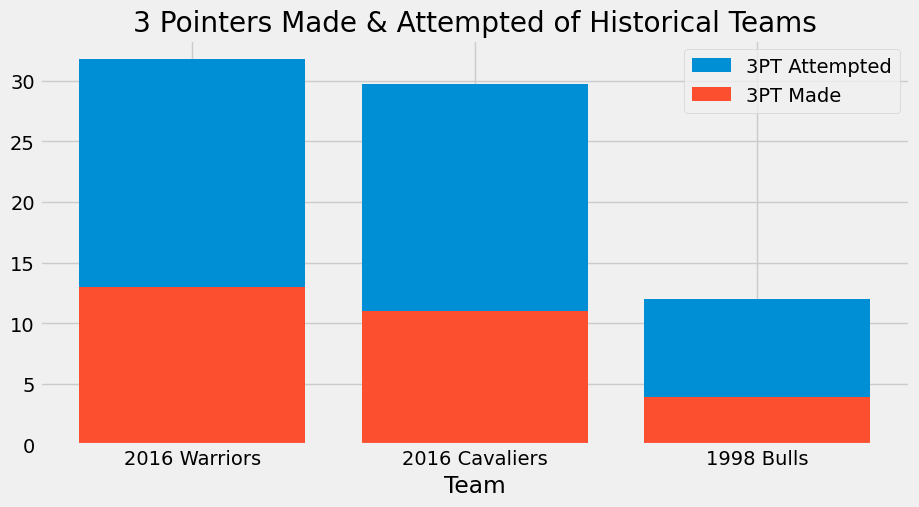

In [ ]:
#Include a comment at the top explaining what the code is doing:  Here we create the bar graph.

# 3 Point Attempted and 3 Point made as together as one number, so we don't have to create stacked bars.
plt.figure(figsize=(10,5))
xaxis_labels=["2016 Warriors", "2016 Cavaliers", "1998 Bulls"]
plt.bar(xaxis_labels, historical_3pt["3pt_attempted"], label = "3PT Attempted")
plt.bar(xaxis_labels, historical_3pt["3pt_made"], label = "3PT Made")
plt.title('3 Pointers Made & Attempted of Historical Teams')
plt.xlabel('Team')
plt.legend(loc = 'upper right');

In [ ]:
# Add as many code cells as you need, by the way.  Just include a comment at the top of each.

In a cohesive, grammatically correct sentence, write here what you learn from the visualization above.  Do not use nebulous words like "thing" or "it".  Be clear and concise.

In [ ]:
# Add more code here if necessary - example - maybe there is a related secondary graph/chart or maybe you found a correlation coefficient....

In a cohesive, grammatically correct sentence, write what you learn from the code above.

**TRY TO END EACH SECTION WITH A SENTENCE THAT LEADS INTO THE NEXT QUESTION, THUS CREATNG FLOW, SUCH AS:**

From what we saw concluded from the visualization above then made us wonder about each best and worst offensive and defensive efficient team, so we decided to ask what team's were the best and worst offensive and defensive efficient team from each season of the dataset.

### Q2 (Part A): For each year of the dataset, what teams had the highest average points per game that season and what was their offensive efficiency? 

In [ ]:
max_pts = """ SELECT year, team AS team_with_max_pts, pts, eff
                    FROM basketball AS outer
                    WHERE pts = 
                      (SELECT MAX(pts)
                      FROM basketball AS inner
                      GROUP BY year
                      HAVING outer.year = inner.year) 
          """
          
max_pts = pd.read_sql_query(max_pts, conn)
max_pts

,year,team_with_max_pts,pts,eff
0,1997-1998,L.A.Lakers,104.8,120.8
1,1998-1999,Sacramento,99.3,108.0
2,1999-2000,Sacramento,104.5,116.2
3,2000-2001,Sacramento,101.4,116.0
4,2001-2002,Dallas,105.6,119.6
5,2002-2003,Dallas,103.2,118.8
6,2003-2004,Dallas,104.9,122.9
7,2004-2005,Phoenix,110.7,126.1
8,2005-2006,Phoenix,108.1,125.2
9,2006-2007,Phoenix,109.5,126.4


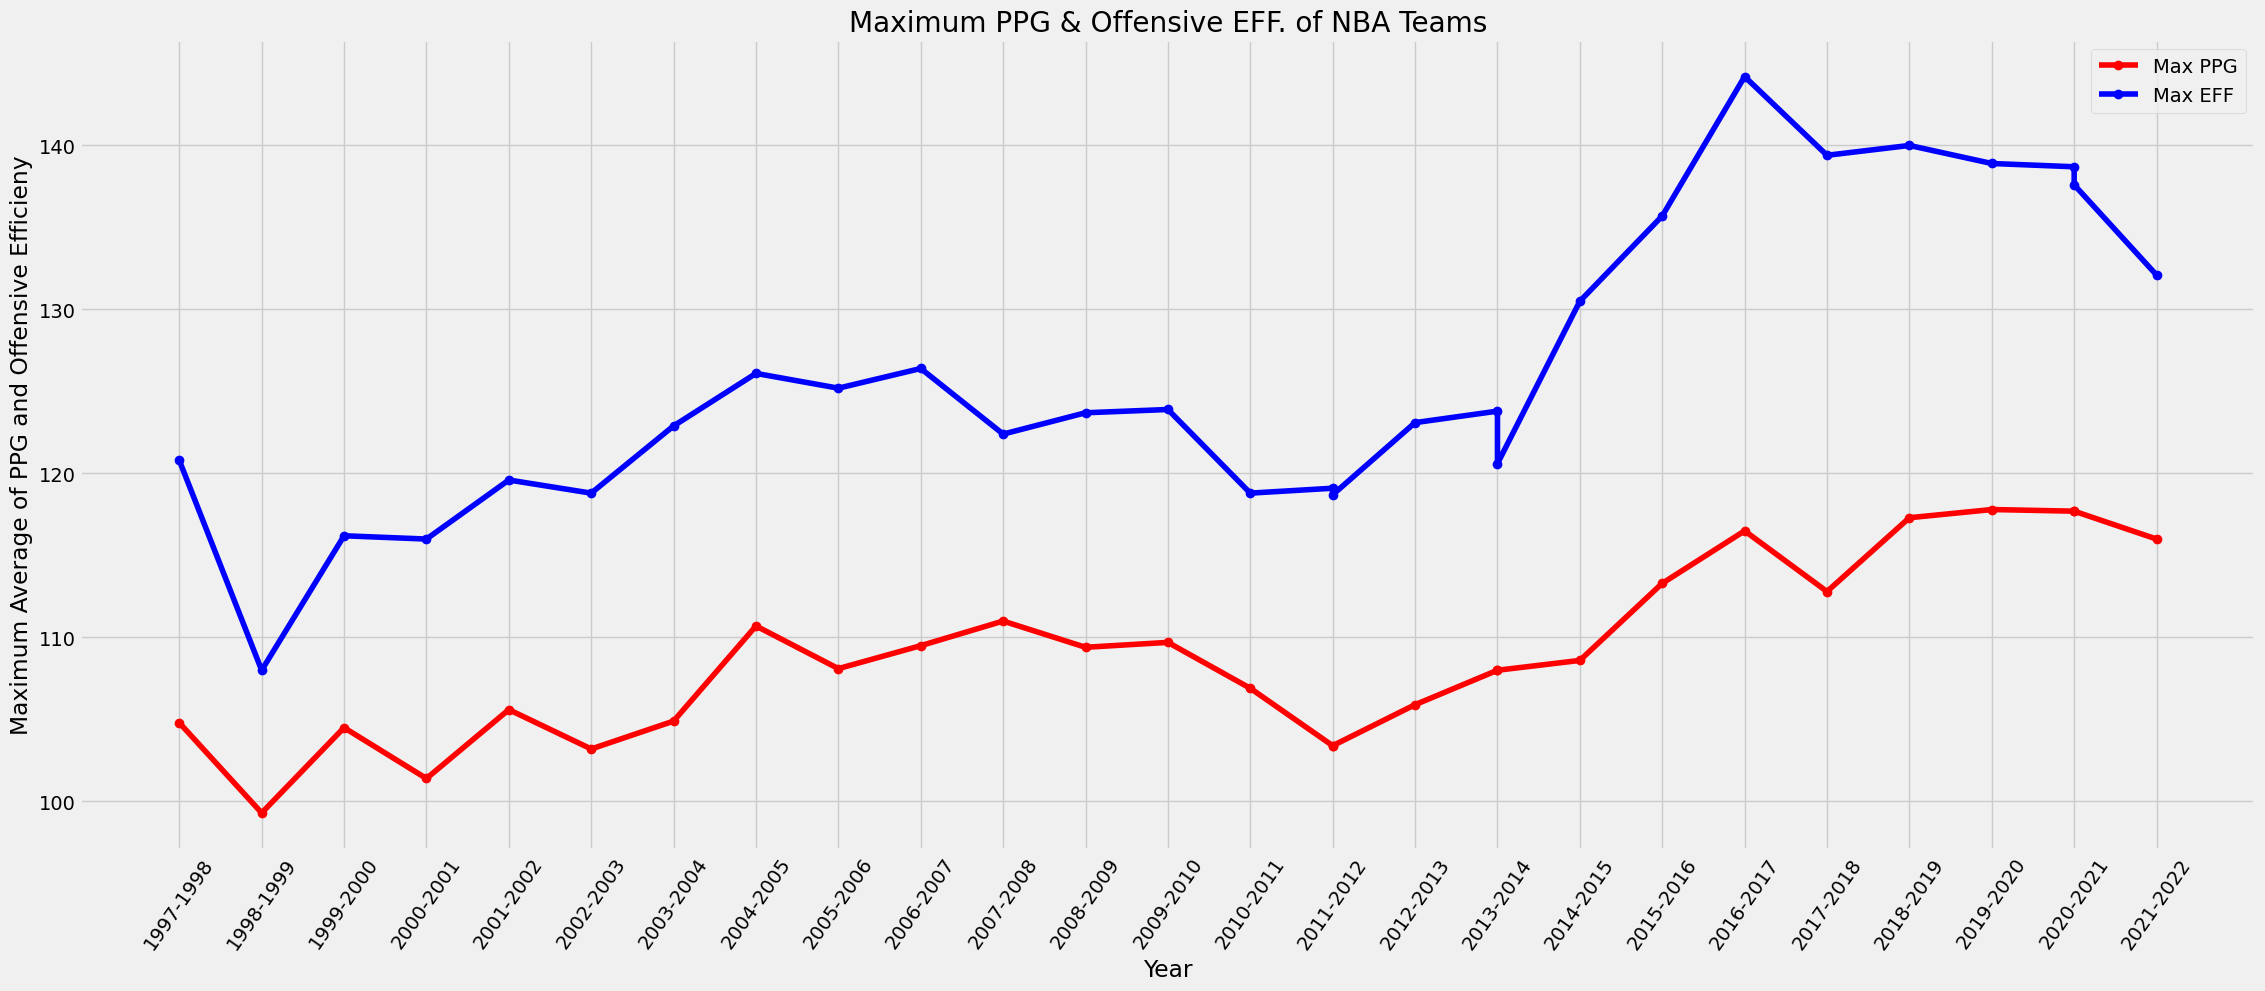

In [ ]:
#There are two points labeled on the "Max EFF" line for the years 2011-2012, 2013-2014, and 2020-2021 because there were two teams
#that averaged the same amount of PPG that year 
plt.figure(figsize=(25,10))
plt.plot(max_pts["year"], max_pts["pts"], label = "Max PPG", color = 'red', marker = 'o')
plt.plot(max_pts["year"], max_pts["eff"], label = "Max EFF", color = 'blue', marker = 'o')
plt.title('Maximum PPG & Offensive EFF. of NBA Teams')
plt.xlabel('Year')
plt.ylabel('Average of PPG and Offensive Efficieny')
plt.xticks(rotation=55)
plt.legend()

In [ ]:
new_corr = max_pts.corr(numeric_only = True)
new_corr
r_iris_max_pts = new_corr["pts"]["eff"]
r_iris_max_pts

0.9264283539806749

### Q2 (Part B): For each year of the dataset, what teams had the lowest average points per game that season and what was their offensive efficiency? 

In [ ]:
min_pts = """ SELECT year, team AS team_with_min_pts, pts, eff
                    FROM basketball AS outer
                    WHERE pts = 
                      (SELECT MIN(pts)
                      FROM basketball AS inner
                      GROUP BY year
                      HAVING outer.year = inner.year) 
          """
min_pts = pd.read_sql_query(min_pts, conn)
min_pts

,year,team_with_min_pts,pts,eff
0,1997-1998,Golden State,88.3,96.0
1,1998-1999,Chicago,81.9,86.2
2,1999-2000,Chicago,84.8,89.3
3,2000-2001,Chicago,87.6,95.7
4,2001-2002,Miami,87.2,98.2
5,2002-2003,Denver,84.2,90.4
6,2003-2004,Toronto,85.4,93.1
7,2004-2005,New Orleans,88.4,94.2
8,2005-2006,Portland,88.8,93.0
9,2006-2007,Atlanta,93.7,101.0


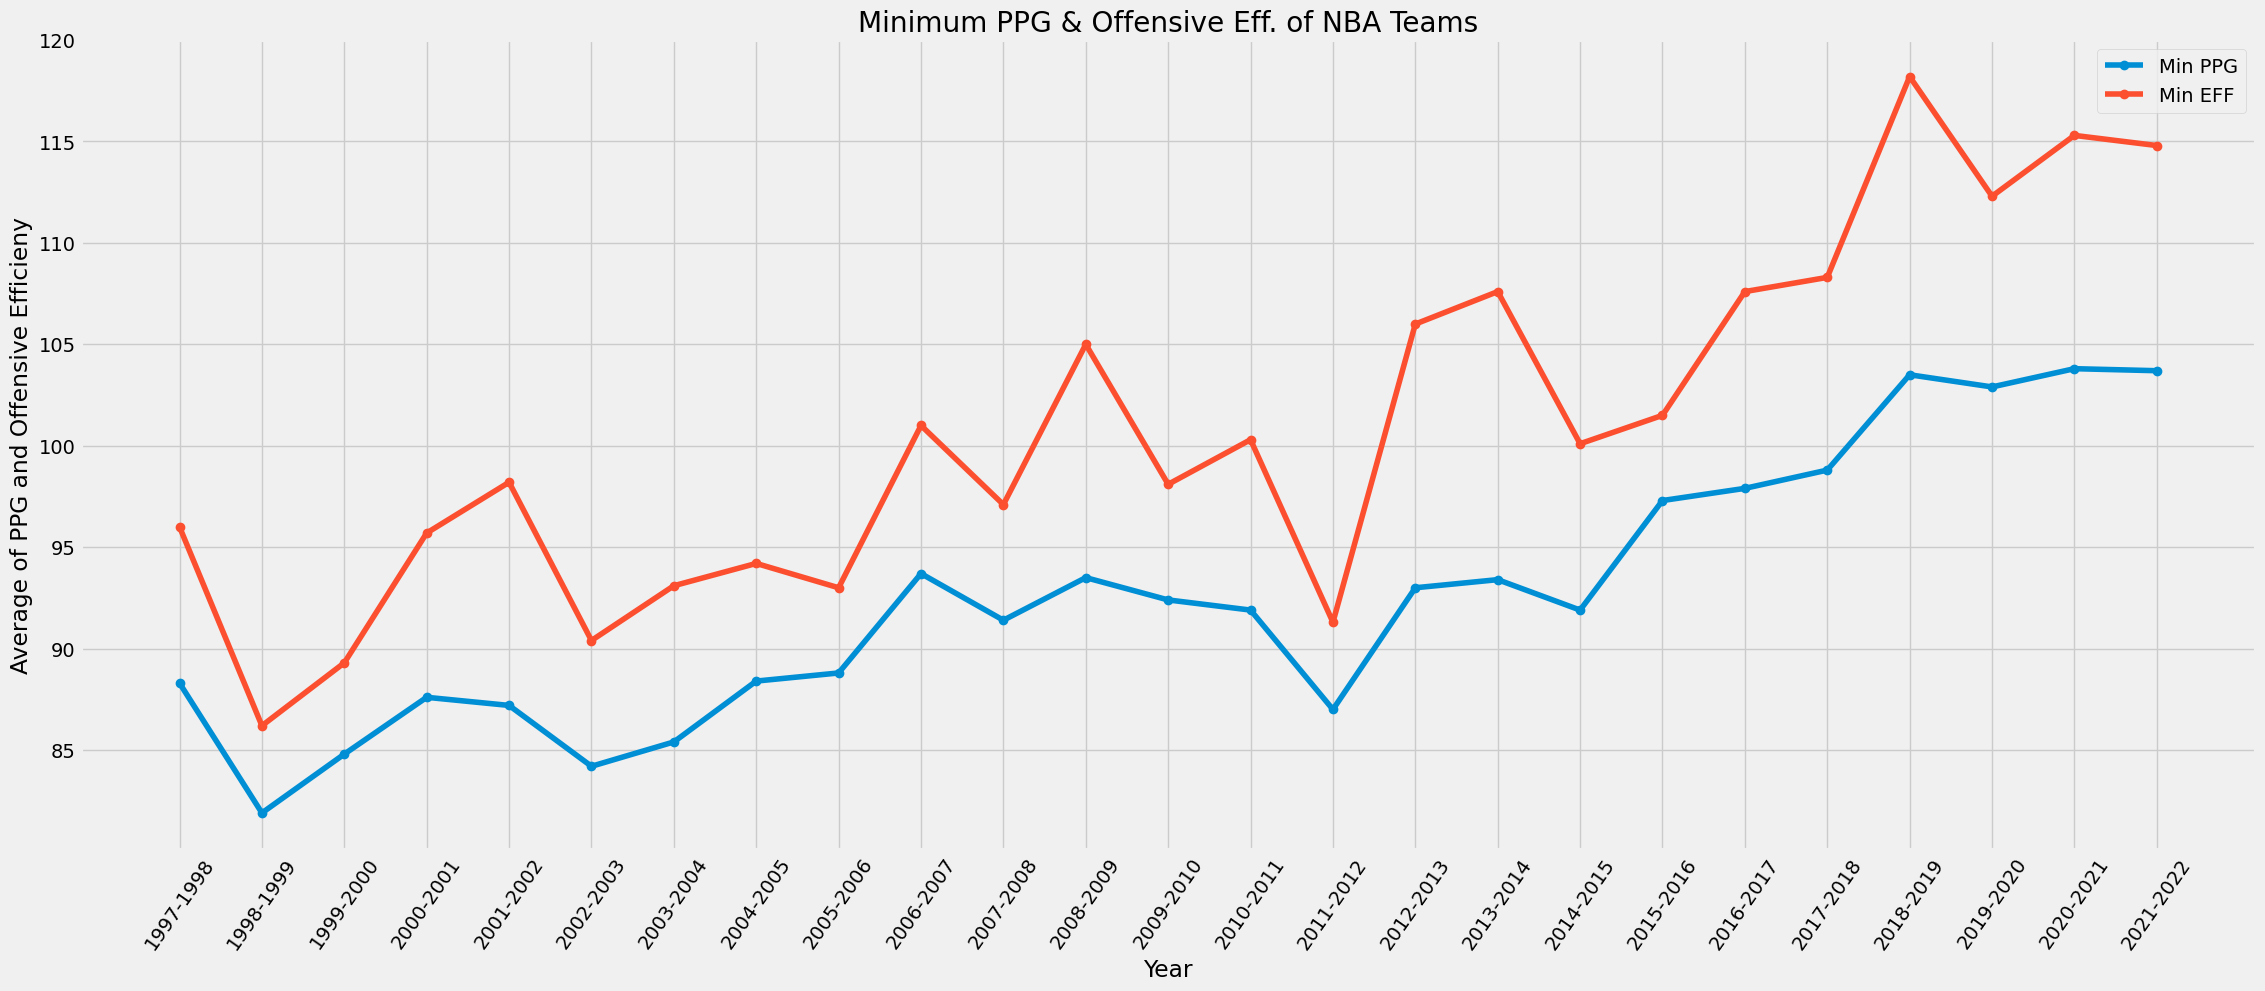

In [ ]:
# Code cells for next SQL comment/visualization, with comments as explained above.
plt.figure(figsize=(25,10))
plt.plot(min_pts["year"], min_pts["pts"], label = "Min PPG", marker = 'o')
plt.plot(min_pts["year"], min_pts["eff"], label = "Min EFF", marker = 'o')
plt.title('Minimum PPG & Offensive Eff. of NBA Teams')
plt.xlabel('Year')
plt.ylabel('Average of PPG and Offensive Efficieny')
plt.xticks(rotation=55)
plt.legend()

In [ ]:
new_corr = min_pts.corr(numeric_only = True)
new_corr
r_iris_min_pts = new_corr["pts"]["eff"]
r_iris_min_pts

0.9546060734544708

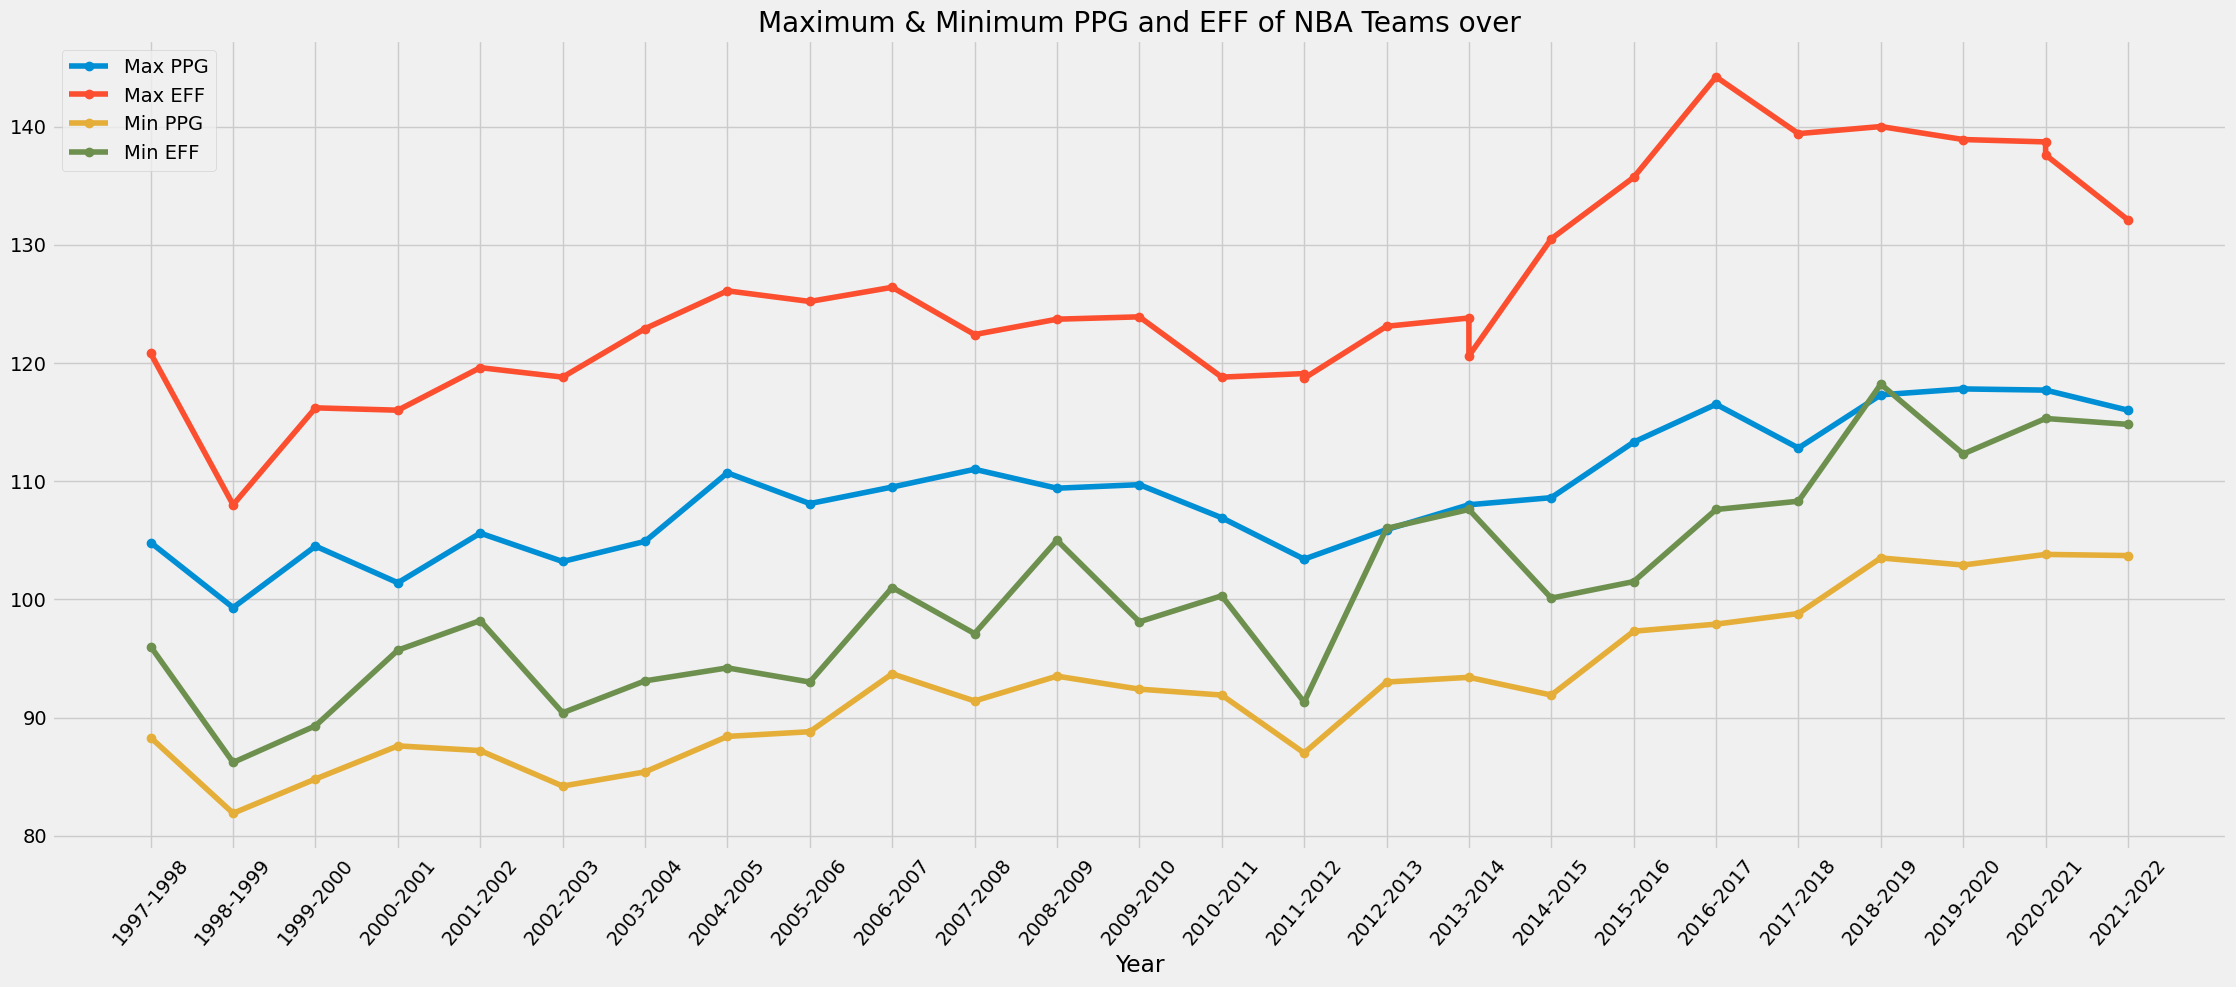

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(max_pts["year"], max_pts["pts"], label = "Max PPG", marker = 'o')
plt.plot(max_pts["year"], max_pts["eff"], label = "Max EFF", marker = 'o')
plt.plot(min_pts["year"], min_pts["pts"], label = "Min PPG", marker = 'o')
plt.plot(min_pts["year"], min_pts["eff"], label = "Min EFF", marker = 'o')
plt.title('Maximum & Minimum PPG and EFF of NBA Teams over')
plt.xlabel('Year')
plt.xticks(rotation=50)
plt.legend()

In a cohesive, grammatically correct sentence, write here what you learn from the visualization above.  Do not use nebulous words like "thing" or "it".  Be clear and concise.

In [ ]:
# Add more code here if necessary - example - maybe there is a related secondary graph/chart or maybe you found a correlation coefficient...


In a cohesive, grammatically correct sentence, write what you learn from the code above.

**TRY TO END EACH SECTION WITH A SENTENCE THAT LEADS INTO THE NEXT QUESTION. DON'T COPY AND PASE THE SENTENCE YOU USED TO DO THIS AT THE END OF THE PREVIOUS QUESTION.  SPICE IT UP A BIT.**

### Q3:  ?????

In [ ]:
Include an opener statement...

In [ ]:
# Code cells for next SQL comment /visualization, with comments as explained above.


,no,team,g,min,pts,reb,ast,stl,blk,to,...,oreb,fgm_a,pct,3gm_a,pct.1,ftm_a,pct.2,eff,dff,year
0,13,Minnesota,84,48.2,116.0,44.3,25.7,8.8,5.6,13.8,...,11.3,41.6-90.9,0.458,14.8-41.2,0.358,18.1-23.3,0.777,132.1,3.2,2021-2022
1,4,Memphis,83,48.2,115.6,49.0,26.0,9.7,6.5,12.5,...,14.0,43.5-94.3,0.461,11.5-32.6,0.352,17.2-23.4,0.734,137.4,13.2,2021-2022
2,9,Milwaukee,83,48.2,115.2,46.9,23.8,7.5,4.0,12.8,...,10.3,41.7-89.3,0.467,14.0-38.4,0.365,17.8-22.9,0.774,131.8,5.0,2021-2022
3,16,Charlotte,83,48.5,115.2,44.6,28.0,8.5,4.9,12.7,...,10.9,42.7-91.4,0.467,13.9-38.2,0.365,15.9-21.5,0.741,134.2,1.0,2021-2022
4,1,Phoenix,83,48.1,114.8,45.1,27.3,8.5,4.5,12.3,...,9.7,43.7-90.0,0.485,11.6-31.8,0.364,15.9-20.0,0.796,137.6,20.2,2021-2022
5,15,Atlanta,85,48.1,113.8,44.0,24.5,7.1,4.2,11.4,...,10.0,41.4-88.1,0.470,12.8-34.4,0.374,18.2-22.4,0.812,131.3,1.8,2021-2022
6,6,Utah,84,48.1,113.3,46.5,22.3,7.0,4.9,13.1,...,10.8,40.5-86.1,0.470,14.4-40.0,0.360,17.9-23.3,0.769,129.9,10.4,2021-2022
7,14,San Antonio,83,48.3,113.0,45.2,27.8,7.6,4.9,12.2,...,11.0,43.2-92.7,0.466,11.3-32.0,0.353,15.4-20.4,0.754,131.7,2.0,2021-2022
8,8,Brooklyn,84,48.2,112.9,44.2,25.3,7.2,5.6,13.3,...,10.2,42.0-88.3,0.476,11.4-31.6,0.362,17.5-21.8,0.803,131.3,5.3,2021-2022
9,10,Denver,84,48.3,112.6,44.0,27.7,7.2,3.7,13.8,...,9.3,41.6-86.4,0.482,12.7-35.9,0.353,16.7-20.9,0.797,132.4,4.8,2021-2022


In a cohesive, grammatically correct sentence, write here what you learn from the visualization above.  Do not use nebulous words like "thing" or "it".  Be clear and concise.

In [ ]:
# Add more code here if necessary - example - maybe there is a related secondary graph/chart or maybe you found a correlation coefficient....

In a cohesive, grammatically correct sentence, write what you learn from the code above.

**TRY TO END EACH SECTION WITH A SENTENCE THAT LEADS INTO THE NEXT QUESTION. DON'T COPY AND PASTE THE SENTENCE YOU USED TO DO THIS AT THE END OF THE PREVIOUS QUESTION.  SPICE IT UP A BIT.**

### Q4:  ?????

In [ ]:
Include an opener statement...

In [ ]:
# Code cells for next SQL comment /visualization, with comments as explained above.

In a cohesive, grammatically correct sentence, write here what you learn from the visualization above.  Do not use nebulous words like "thing" or "it".  Be clear and concise.

In [ ]:
# Add more code here if necessary - example - maybe there is a related secondary graph/chart or maybe you found a correlation coefficient....

In a cohesive, grammatically correct sentence, write what you learn from the code above.

**TRY TO END EACH SECTION WITH A SENTENCE THAT LEADS INTO THE NEXT QUESTION. DON'T COPY AND PASTE THE SENTENCE YOU USED TO DO THIS AT THE END OF THE PREVIOUS QUESTION.  SPICE IT UP A BIT.**

### Q5:  ?????

In [ ]:
Include an opener statement...

In [ ]:
# Code cells for next SQL comment /visualization, with comments as explained above.

In a cohesive, grammatically correct sentence, write here what you learn from the visualization above.  Do not use nebulous words like "thing" or "it".  Be clear and concise.

In [ ]:
# Add more code here if necessary - example - maybe there is a related secondary graph/chart or maybe you found a correlation coefficient....

In a cohesive, grammatically correct sentence, write what you learn from the code above.

**TRY TO END EACH SECTION WITH A SENTENCE THAT LEADS INTO THE NEXT QUESTION. DON'T COPY AND PASTE THE SENTENCE YOU USED TO DO THIS AT THE END OF THE PREVIOUS QUESTION.  SPICE IT UP A BIT.**

### Q6+:  You can add more questions if interesting findings arise...

---

## Conclusion

This section should summarize your findings and bring your write-up to a close.  You should also describe what additional questions you would like to consider if you had more time and what data could be incorporated to shed more light on your topic.

**BEFORE SUBMITTING GO BACK AND DELETE ALL MY COMMENTS, LIKE THIS ONE.  PTS WILL BE DEDUCTED OTHERWISE.**

In [ ]:
sql_statement = """SELECT * 
                   FROM basketball"""

basketball = pd.read_sql_query(sql_statement, conn)
basketball

,no,team,g,min,pts,reb,ast,stl,blk,to,...,oreb,fgm_a,pct,3gm_a,pct.1,ftm_a,pct.2,eff,dff,year
0,1,Chicago,103,48.4,96.0,44.1,23.1,8.6,4.3,13.0,...,14.9,36.7-81.7,0.449,3.9-12.0,0.323,18.7-25.2,0.741,111.6,17.5,1997-1998
1,2,Utah,102,48.3,98.6,40.8,24.7,7.6,4.8,14.7,...,11.3,35.9-74.3,0.483,3.1-8.4,0.368,23.8-30.9,0.768,116.3,17.5,1997-1998
2,3,Phoenix,86,48.6,99.3,41.9,25.6,9.2,5.3,14.4,...,12.1,38.2-82.0,0.466,5.2-14.7,0.355,17.7-23.6,0.747,117.1,13.6,1997-1998
3,4,L.A.Lakers,95,48.3,104.8,42.9,24.3,8.7,6.8,14.7,...,13.2,38.0-79.1,0.480,6.1-17.3,0.350,22.8-33.7,0.675,120.8,13.2,1997-1998
4,5,San Antonio,91,48.4,92.5,44.1,21.9,6.2,6.9,15.3,...,11.9,35.1-75.1,0.468,3.7-10.8,0.344,18.5-26.8,0.688,108.0,13.1,1997-1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,26,Orlando,82,48.2,104.2,44.3,23.7,6.8,4.5,13.8,...,9.1,38.3-88.3,0.434,12.2-36.8,0.331,15.5-19.7,0.787,115.5,-16.0,2021-2022
739,27,Detroit,82,48.2,104.8,43.0,23.5,7.7,4.8,13.4,...,11.0,38.2-88.6,0.430,11.3-34.6,0.326,17.2-22.0,0.782,115.1,-16.7,2021-2022
740,28,Portland,82,48.1,106.2,42.9,22.9,8.0,4.5,13.7,...,10.4,38.5-87.1,0.443,12.7-36.8,0.346,16.4-21.6,0.760,117.1,-19.0,2021-2022
741,29,Oklahoma City,82,48.3,103.7,45.6,22.2,7.6,4.6,13.3,...,10.4,38.3-89.1,0.430,12.1-37.4,0.323,15.0-19.9,0.756,114.8,-19.2,2021-2022


In [ ]:
sql_statement = """SELECT year, pts, reb
                   FROM basketball
                   GROUP BY year
                   ORDER BY reb ASC
                   """

basketball_first = pd.read_sql_query(sql_statement, conn)
basketball_first

,year,pts,reb,'3gm_a'
0,2006-2007,109.5,40.5,3gm_a
1,2000-2001,96.6,40.6,3gm_a
2,2005-2006,96.6,40.9,3gm_a
3,2007-2008,99.0,41.5,3gm_a
4,2008-2009,99.9,41.9,3gm_a
5,2009-2010,104.5,41.9,3gm_a
6,2004-2005,96.4,42.3,3gm_a
7,1998-1999,91.7,43.0,3gm_a
8,2013-2014,105.6,43.0,3gm_a
9,2015-2016,103.4,43.4,3gm_a


In [ ]:
#Create plot here with the desired specifications
sql_statement = """SELECT year, pts, reb
                   FROM basketball
                   GROUP BY year
                   ORDER BY reb ASC
                   """

basketball_first = pd.read_sql_query(sql_statement, conn)

Text(0, 0.5, 'reb')

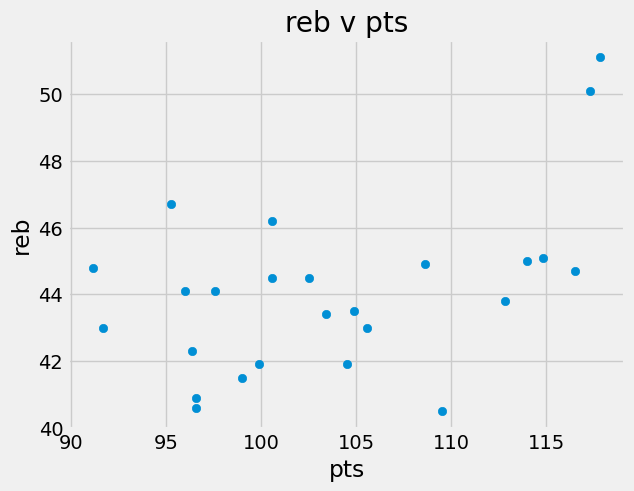

In [ ]:
plt.scatter(basketball_first['pts'],basketball_first['reb'])
plt.title("reb v pts")
plt.xlabel('pts')
plt.ylabel('reb')

In [ ]:
sql_statement = """SELECT pts, dff
                   FROM basketball
                   """

basketball_second = pd.read_sql_query(sql_statement, conn)
basketball_second

,pts,dff
0,96.0,17.5
1,98.6,17.5
2,99.3,13.6
3,104.8,13.2
4,92.5,13.1
...,...,...
738,104.2,-16.0
739,104.8,-16.7
740,106.2,-19.0
741,103.7,-19.2


([<matplotlib.axis.XTick at 0x7ff50c5ef940>,
 [Text(80, 0, '80'),
  Text(84, 0, '84'),
  Text(88, 0, '88'),
  Text(92, 0, '92'),
  Text(96, 0, '96'),
  Text(100, 0, '100'),
  Text(104, 0, '104'),
  Text(108, 0, '108'),
  Text(112, 0, '112'),
  Text(116, 0, '116')])

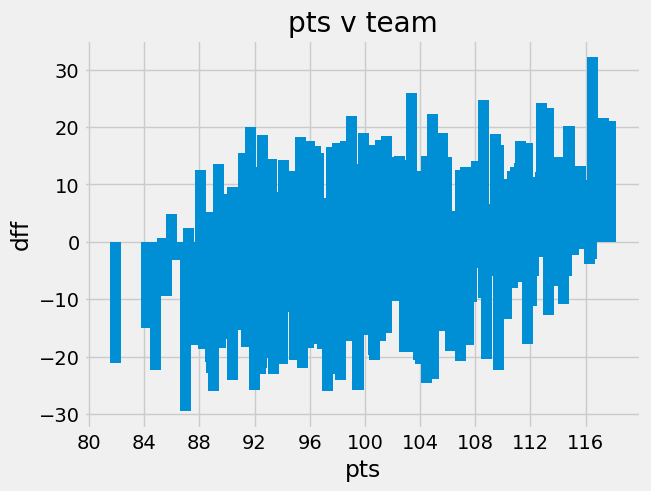

In [ ]:
#Create plot here with the desired specifications
plt.bar(basketball_second['pts'],basketball_second['dff'])
plt.title("pts v team")
plt.xlabel('pts')
plt.ylabel('dff')
plt.xticks(np.arange(80, 120,4))

In [ ]:
basketball_first = new_corr ["reb"]["pts"]
basketball_first

NameError: ignored